[A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576)

Code here follows the [TensorFlow](https://www.tensorflow.org/) implementation by Mark Chang found [here](https://github.com/ckmarkoh/neuralart_tensorflow).

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import scipy.io
import scipy.misc
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from skimage.transform import resize

In [2]:
vggmodelfile = 'imagenet-vgg-verydeep-19.mat'
if not os.path.isfile(os.path.join('.', vggmodelfile)):
    import six.moves.urllib.request as request
    # use `dl=1` as part of query to force a download
    origin = ('https://www.dropbox.com/s/qy9gikdpuq95w8n/%s?dl=1' % vggmodelfile)
    print('Downloading VGG16 model from: %s' % origin)
    request.urlretrieve(origin, vggmodelfile)

In [3]:
image_dir = './images'
source_image = 'MALcloudGate2560x1600.jpg'
style_image = 'impressionist.jpg'

source = os.path.join(image_dir, source_image)
style = os.path.join(image_dir, style_image)

if os.path.isdir(image_dir):
    print('Image directory is ready...')
else:
    os.makedirs(image_dir)
        
if os.path.exists(source):
    print('Source image exists...')
else:
    import six.moves.urllib.request as request
    origin = ('https://www.dropbox.com/s/9cosz20ijl4xerm/%s?dl=1' % source_image)
    print('Downloading source image from: %s' % origin)
    request.urlretrieve(origin, source)

if os.path.exists(style):
    print('Style image exists...')
else:
    import six.moves.urllib.request as request
    origin = ('https://www.dropbox.com/s/8frdjcgf7vnjosx/%s?dl=1' % style_image)
    print('Downloading style image from: %s' % origin)
    request.urlretrieve(origin, style)

Image directory is ready...
Source image exists...
Style image exists...


In [4]:
def imshow_clean(img, interpolation=None):
    fig = plt.figure()
    ax = plt.gca()
    ax.axis('off')
    im = ax.imshow(img, interpolation=interpolation)
    return im

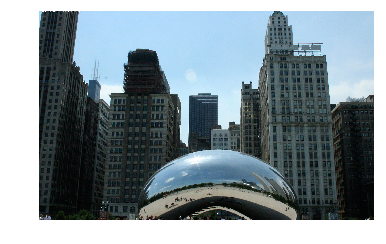

In [5]:
source_data = plt.imread(source)
imshow_clean(source_data)

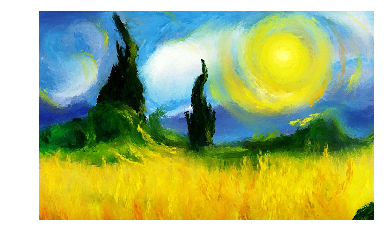

In [6]:
style_data = plt.imread(style)
imshow_clean(style_data)

In [8]:
print(source_data.shape)
print(style_data.shape)

(1600, 2560, 3)
(1200, 1920, 3)


In TensorFlow, image tensor shapes should be : `N x H x W x NChannels`. We will be using a pre-trained VGG16 model here, so we need to resize our images appropriately.

In [12]:
IMAGE_W = 800   # 1.333 aspect ratio
IMAGE_H = 600

In [20]:
1600 * 1.333

2132.7999999999997

(1200, 1600, 3)


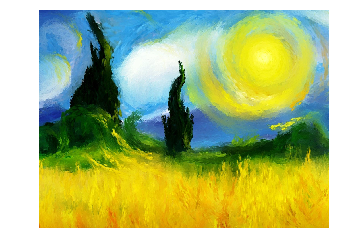

In [23]:
style_clipped = style_data[:,160:1760,:]   # 1200 * 1.333 ~ 1600, take center clip
print(style_clipped.shape)
imshow_clean(style_clipped)

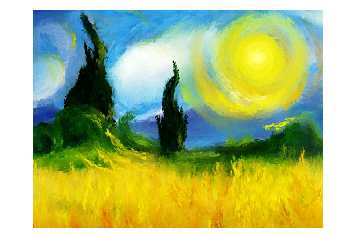

In [24]:
style_resized = resize(style_clipped, (IMAGE_H, IMAGE_W, 3))
imshow_clean(style_resized)

(1600, 2132, 3)


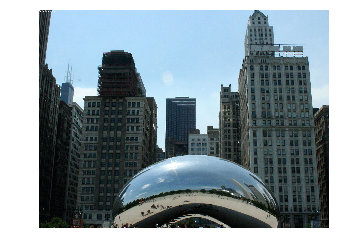

In [25]:
source_clipped = source_data[:,214:2346,:]    # 1600 * 1.333 ~ 2132, take center clip
print(source_clipped.shape)
imshow_clean(source_clipped)

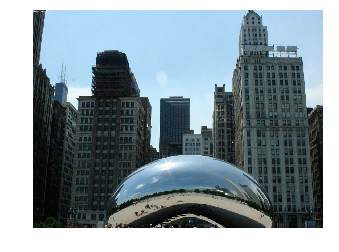

In [26]:
source_resized = resize(source_clipped, (IMAGE_H, IMAGE_W, 3))
imshow_clean(source_resized)

In [27]:
print(source_resized.shape)
print(style_resized.shape)

(600, 800, 3)
(600, 800, 3)
